In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
1657,1520372160,NaN,NaN,NaN,NaN,0.654339,0.025497,865323.0,-0.010816,0.081297
1709,1520375280,NaN,8680.46,8680.46,8680.46,0.371350,0.024812,872689.0,0.006467,0.094706
2861,1520444460,NaN,NaN,7907.19,7911.75,0.357159,0.569371,195556.0,0.022494,0.145950
3358,1520474220,NaN,NaN,NaN,7979.99,0.010000,0.257240,43314.0,0.066666,0.031460


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,3.768000e+03,3764.000000,3765.000000,3766.000000,3767.000000,3768.000000,3768.000000,3.768000e+03,3768.000000,3768.000000
mean,1.520386e+09,8637.460167,8643.541267,8640.538678,8640.157295,1.886297,0.072246,7.022261e+05,0.045033,0.111781
std,6.540255e+04,475.150773,471.226540,473.102524,473.264045,4.867452,0.078412,3.131129e+05,0.034556,0.053119
min,1.520272e+09,7605.060000,7699.780000,7692.010000,7657.880000,0.001000,-0.076714,3.705000e+04,-0.017144,-0.040045
25%,1.520329e+09,8169.080000,8190.000000,8179.402500,8178.570000,0.130000,0.041517,4.942238e+05,0.018607,0.066106
50%,1.520386e+09,8667.945000,8670.000000,8669.990000,8669.990000,0.480000,0.062470,7.377170e+05,0.046385,0.112870
75%,1.520442e+09,9094.010000,9096.250000,9094.650000,9094.010000,1.659471,0.082892,9.139908e+05,0.073280,0.163500
max,1.520499e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.365095e+06,0.110500,0.211511


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.952377,-0.953967,-0.953209,-0.953192,0.140665,0.162261,-0.720263,-0.077157,-0.186290
low,-0.952377,1.000000,0.999634,0.999772,0.999847,-0.208379,-0.243667,0.725632,0.088475,0.297225
high,-0.953967,0.999634,1.000000,0.999843,0.999824,-0.188475,-0.234493,0.726209,0.087743,0.297699
open,-0.953209,0.999772,0.999843,1.000000,0.999728,-0.195393,-0.239830,0.725925,0.088430,0.297159
close,-0.953192,0.999847,0.999824,0.999728,1.000000,-0.199204,-0.241550,0.726553,0.088121,0.297335
volume,0.140665,-0.208379,-0.188475,-0.195393,-0.199204,1.000000,0.381410,-0.146706,-0.054860,-0.011228
tw_sentiment,0.162261,-0.243667,-0.234493,-0.239830,-0.241550,0.381410,1.000000,-0.252556,-0.013635,-0.008535
tw_followers,-0.720263,0.725632,0.726209,0.725925,0.726553,-0.146706,-0.252556,1.000000,0.068475,0.144754
reddit_sentiment,-0.077157,0.088475,0.087743,0.088430,0.088121,-0.054860,-0.013635,0.068475,1.000000,-0.431130
google_sentiment,-0.186290,0.297225,0.297699,0.297159,0.297335,-0.011228,-0.008535,0.144754,-0.431130,1.000000


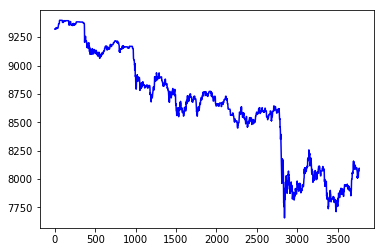

In [5]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da42860>,
      dtype=object)

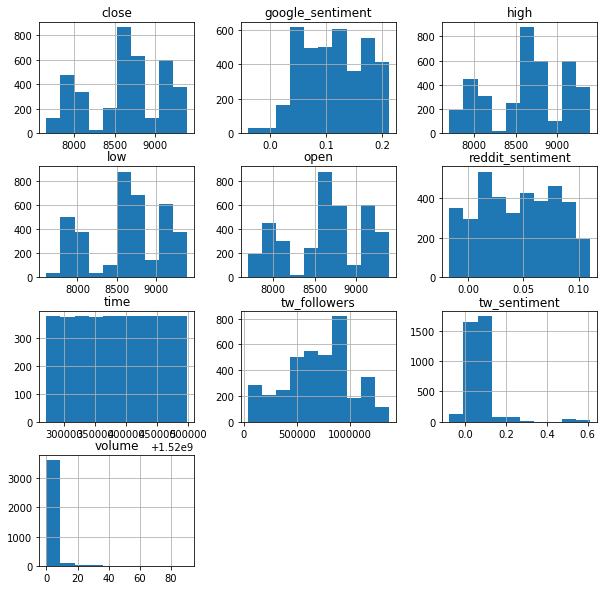

In [6]:
df.hist(figsize=(10,10))

In [7]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [8]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x12616a9b0>], 'g')

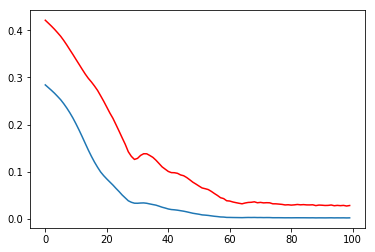

In [9]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

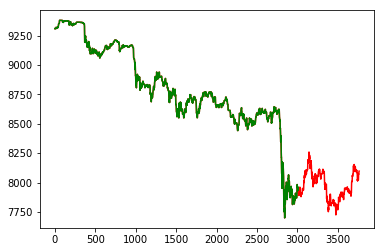

In [10]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [11]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

0 / 752 ---> predicted Order.DOWN - real Order.STAY
18 / 752 ---> predicted Order.UP - real Order.STAY
26 / 752 ---> predicted Order.DOWN - real Order.STAY
27 / 752 ---> predicted Order.UP - real Order.STAY
28 / 752 ---> predicted Order.UP - real Order.DOWN
32 / 752 ---> predicted Order.DOWN - real Order.UP
38 / 752 ---> predicted Order.UP - real Order.STAY
41 / 752 ---> predicted Order.DOWN - real Order.UP
50 / 752 ---> predicted Order.UP - real Order.STAY
51 / 752 ---> predicted Order.UP - real Order.STAY
52 / 752 ---> predicted Order.UP - real Order.DOWN
61 / 752 ---> predicted Order.UP - real Order.STAY
64 / 752 ---> predicted Order.UP - real Order.STAY
92 / 752 ---> predicted Order.UP - real Order.STAY
102 / 752 ---> predicted Order.UP - real Order.STAY
104 / 752 ---> predicted Order.UP - real Order.STAY
106 / 752 ---> predicted Order.UP - real Order.DOWN
108 / 752 ---> predicted Order.DOWN - real Order.STAY
111 / 752 ---> predicted Order.UP - real Order.STAY
119 / 752 ---> predic

701 / 752 ---> predicted Order.DOWN - real Order.STAY
704 / 752 ---> predicted Order.DOWN - real Order.UP
708 / 752 ---> predicted Order.UP - real Order.STAY
712 / 752 ---> predicted Order.DOWN - real Order.UP
714 / 752 ---> predicted Order.DOWN - real Order.UP
718 / 752 ---> predicted Order.DOWN - real Order.STAY
720 / 752 ---> predicted Order.DOWN - real Order.STAY
722 / 752 ---> predicted Order.UP - real Order.STAY
723 / 752 ---> predicted Order.UP - real Order.STAY
727 / 752 ---> predicted Order.UP - real Order.DOWN
739 / 752 ---> predicted Order.DOWN - real Order.STAY
740 / 752 ---> predicted Order.UP - real Order.STAY
742 / 752 ---> predicted Order.UP - real Order.STAY
750 / 752 ---> predicted Order.UP - real Order.STAY
Error Order percentage: 26.60%


Found best bandwidth : 0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126aa30f0>]],
      dtype=object)

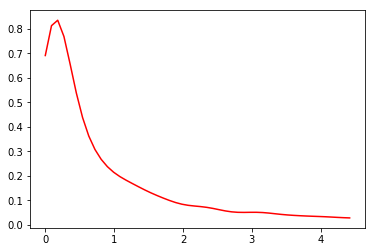

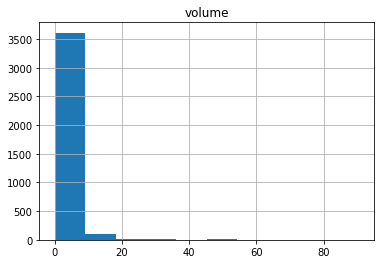

In [51]:
from sklearn.neighbors import KernelDensity
import numpy as np

X = df['volume'].values.reshape(-1, 1)

percentile_90_vol = np.percentile(df['volume'], 90)
median_vol = np.median(df['volume'])

x = np.linspace(0,percentile_vol)

steps = np.arange(0.01, 3, 0.01)
for s in steps:
    kde = KernelDensity(kernel='gaussian', bandwidth=s).fit(X)
    if np.exp(kde.score(median_vol)) > 0.5:
        print("Found best bandwidth : %s" % s)
        break

log_dens = kde.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(log_dens), 'r')
df.hist(column='volume')